## <code style="color:Crimson">Simple Model vs Complex Model</code>

#### This notebook will help us understand what exactly a Model is and how feature engineering helps in model building

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [2]:
# import the dataset
df = pd.read_csv('age_salary.csv')
df.head()

,Age,Salary
0,15,10
1,16,12
2,18,13
3,20,18
4,22,30


In [3]:
# check data types
df.dtypes

Age       int64
Salary    int64
dtype: object

In [4]:
# seperate features and target
x = df[['Age']]
y = df[['Salary']]

Text(0, 0.5, 'Salary')

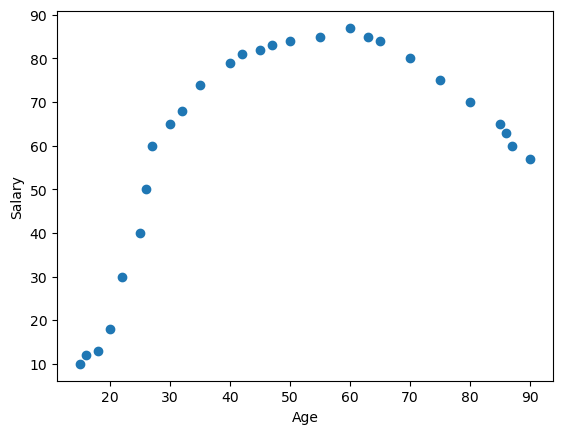

In [5]:
# Plot the data
plt.scatter(x,y)
plt.xlabel('Age')
plt.ylabel('Salary')

In [6]:
# import linear regression model
from sklearn.linear_model import LinearRegression

In [7]:
#create an object of the class LinearRegression
lr = LinearRegression()

In [8]:
# train the model
model = lr.fit(x, y)

In [9]:
# make predictions using the model
ypred = model.predict(x)

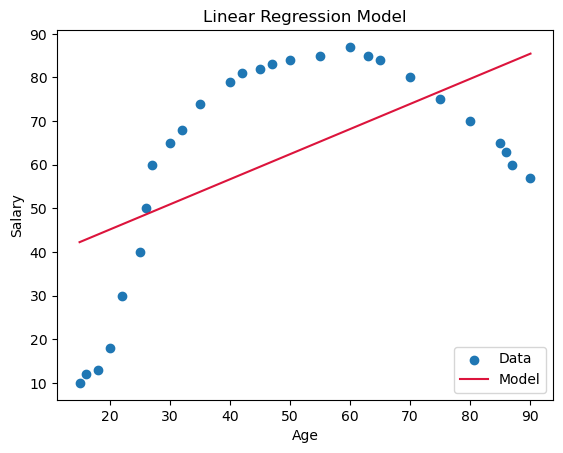

In [10]:
# Check how your model fits the data
plt.scatter(x,y)
plt.plot(x,ypred, color='crimson' )
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend(['Data', 'Model'], loc='lower right')
plt.title('Linear Regression Model')
plt.show()

##  y = β<sub>1</sub>x + β<sub>0</sub>

Where y = Salary, x = age, β<sub>0</sub> = intercept, β<sub>1</sub> = Coefficiant

In [11]:
# get the parameters
print('model intercept is', model.intercept_)
print('Coefficiant is', model.coef_)

model intercept is [33.61682781]
Coefficiant is [[0.57606864]]


In [12]:
# Predict Salary if your age is 61
y_salary = (0.57*61) + 33.611
print(y_salary)

68.381


## Evaluate your model

In [13]:
# Check the error
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = mean_squared_error(y, ypred, squared=False)
rmse

20.05920880684126

### Straight line definately doesnot fit. Let's generate polynomial equation with degree 2 to 17

In [14]:
pf2 = PolynomialFeatures(degree=2, include_bias=False)
x2 = pf2.fit_transform(x)
x2.shape

(27, 2)

In [15]:
x2

array([[  15.,  225.],
       [  16.,  256.],
       [  18.,  324.],
       [  20.,  400.],
       [  22.,  484.],
       [  25.,  625.],
       [  26.,  676.],
       [  27.,  729.],
       [  30.,  900.],
       [  32., 1024.],
       [  35., 1225.],
       [  40., 1600.],
       [  42., 1764.],
       [  45., 2025.],
       [  47., 2209.],
       [  50., 2500.],
       [  55., 3025.],
       [  60., 3600.],
       [  63., 3969.],
       [  65., 4225.],
       [  70., 4900.],
       [  75., 5625.],
       [  80., 6400.],
       [  85., 7225.],
       [  86., 7396.],
       [  87., 7569.],
       [  90., 8100.]])

In [16]:
# train the model
lr2 = LinearRegression()
model2 = lr2.fit(x2, y)

# make predictions using the model
ypred2 = model2.predict(x2)

# Check the error
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = mean_squared_error(y, ypred2, squared=False)
print(rmse)

5.332958118425451


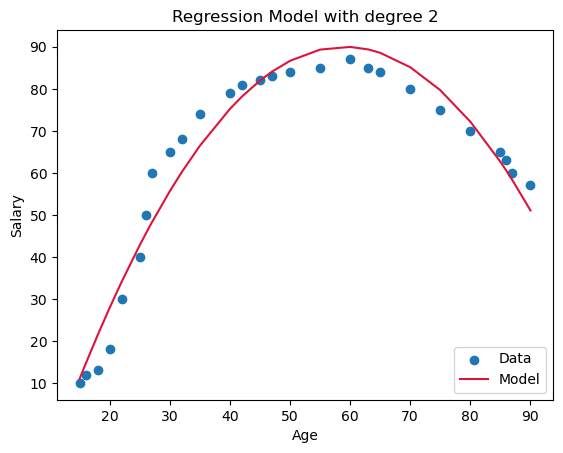

In [17]:
# Check how your model fits the data
plt.scatter(x,y)
plt.plot(x,ypred2, color='crimson' )
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend(['Data', 'Model'], loc='lower right')
plt.title('Regression Model with degree 2')
plt.show()

## y = β<sub>0</sub> + β<sub>1</sub>x + β<sub>2</sub>x<sup>2</sup>

In [18]:
# get the parameters
print('Model 2 intercept is', model2.intercept_)
print('Model 2 coefficiant is', model2.coef_)

Model 2 intercept is [-52.01598742]
Model 2 coefficiant is [[ 4.80868606 -0.04070522]]


In [19]:
# Try more complex model
pf3 = PolynomialFeatures(degree=3, include_bias=False)
x3 = pf3.fit_transform(x)
x3.shape

(27, 3)

In [20]:
x3

array([[1.50000e+01, 2.25000e+02, 3.37500e+03],
       [1.60000e+01, 2.56000e+02, 4.09600e+03],
       [1.80000e+01, 3.24000e+02, 5.83200e+03],
       [2.00000e+01, 4.00000e+02, 8.00000e+03],
       [2.20000e+01, 4.84000e+02, 1.06480e+04],
       [2.50000e+01, 6.25000e+02, 1.56250e+04],
       [2.60000e+01, 6.76000e+02, 1.75760e+04],
       [2.70000e+01, 7.29000e+02, 1.96830e+04],
       [3.00000e+01, 9.00000e+02, 2.70000e+04],
       [3.20000e+01, 1.02400e+03, 3.27680e+04],
       [3.50000e+01, 1.22500e+03, 4.28750e+04],
       [4.00000e+01, 1.60000e+03, 6.40000e+04],
       [4.20000e+01, 1.76400e+03, 7.40880e+04],
       [4.50000e+01, 2.02500e+03, 9.11250e+04],
       [4.70000e+01, 2.20900e+03, 1.03823e+05],
       [5.00000e+01, 2.50000e+03, 1.25000e+05],
       [5.50000e+01, 3.02500e+03, 1.66375e+05],
       [6.00000e+01, 3.60000e+03, 2.16000e+05],
       [6.30000e+01, 3.96900e+03, 2.50047e+05],
       [6.50000e+01, 4.22500e+03, 2.74625e+05],
       [7.00000e+01, 4.90000e+03, 3.4300

In [21]:
# train the model
model3 = LinearRegression().fit(x3, y)

# make predictions using the model
ypred3 = model3.predict(x3)

# Check the error
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = mean_squared_error(y, ypred3, squared=False)
rmse

3.6036589414088724

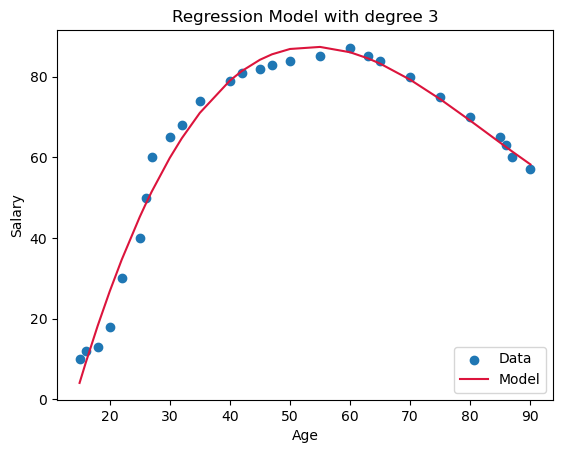

In [22]:
# Check how your model fits the data
plt.scatter(x,y)
plt.plot(x,ypred3, color='crimson' )
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend(['Data', 'Model'], loc='lower right')
plt.title('Regression Model with degree 3')
plt.show()

## y = β<sub>0</sub> + β<sub>1</sub>x + β<sub>2</sub>x<sup>2</sup> + β<sub>3</sub>x<sup>3</sup>

In [23]:
# get the parameters
print('Model 3 coefficiant is', model3.coef_)
print('Model 3 intercept is', model3.intercept_)

Model 3 coefficiant is [[ 7.95638295e+00 -1.09703964e-01  4.42836147e-04]]
Model 3 intercept is [-92.05412327]


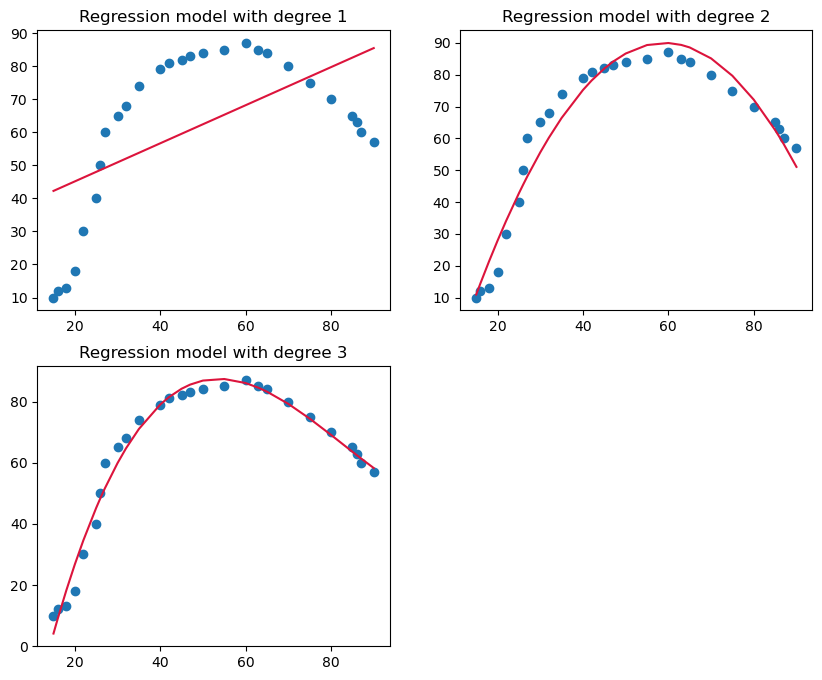

In [24]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)  #(no. of rows, no. of columns, position of the chart)
plt.scatter(x,y)
plt.title('Regression model with degree 1')
plt.plot(x, ypred, color='crimson')

plt.subplot(2,2,2)  #(no. of rows, no. of columns, position of the chart)
plt.scatter(x,y)
plt.title('Regression model with degree 2')
plt.plot(x, ypred2, color='crimson')

plt.subplot(2,2,3)  #(no. of rows, no. of columns, position of the chart)
plt.scatter(x,y)
plt.title('Regression model with degree 3')
plt.plot(x, ypred3, color='crimson')

plt.show()

### Instead of doing it individually, let's use a for loop:

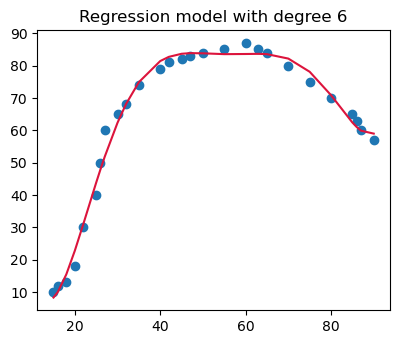

RMSE is: 2.6397988250374116


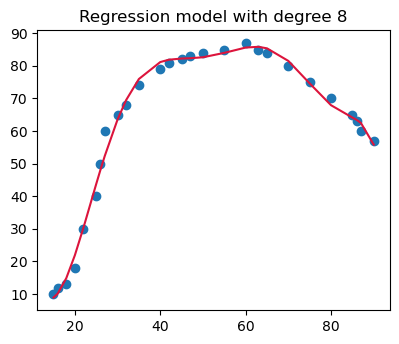

RMSE is: 2.2465137612260815


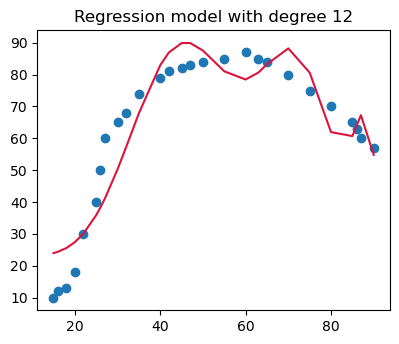

RMSE is: 8.614729512882906


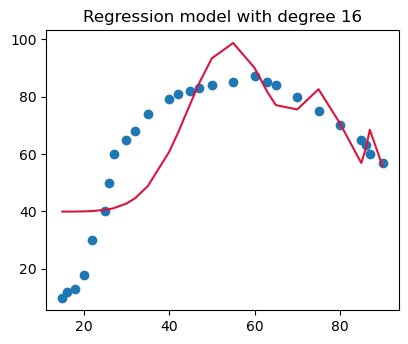

RMSE is: 15.182186884063636


In [25]:
#Create empty lists to store Degree of the polynomial, BIC values for each model, and R2 value for each model.
D=[]
n=1


for degree in [6, 8, 12, 16]:
    

    pf = PolynomialFeatures(degree=degree)
    xp = pf.fit_transform(x)
    
    # train the model
    model = LinearRegression().fit(xp, y)

    # make predictions using the model
    ypred = model.predict(xp)
    

    # Plot
    plt.figure(figsize=(10,8))
    plt.subplot(2,2,n)  #(no. of rows, no. of columns, position of the chart)
    plt.scatter(x,y)
    plt.title('Regression model with degree {}'.format(degree))
    plt.plot(x, ypred, color='crimson')
    n+=1
    plt.show()
    
    # Calculate RMSE
    rmse = mean_squared_error(y, ypred, squared=False)
    print('RMSE is:',rmse)
    
    
    D.append(degree)


## Ploting a 3D Plot

In [27]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.linear_model import LinearRegression

# create some sample data
np.random.seed(123)
n_samples = 100
x1 = np.random.normal(0, 1, n_samples)
x2 = np.random.normal(0, 1, n_samples)
y = 2 * x1 - 3 * x2 + np.random.normal(0, 1, n_samples)

# create a pandas DataFrame to store the data
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

# create a linear regression model with 2 features and 1 target
model = LinearRegression()
X = df[['x1', 'x2']]
y = df['y']
model.fit(X, y)

# create a meshgrid of points in the 2D feature space
x1_min, x1_max = X['x1'].min() - 1, X['x1'].max() + 1
x2_min, x2_max = X['x2'].min() - 1, X['x2'].max() + 1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.2),
                     np.arange(x2_min, x2_max, 0.2))

# use the trained model to predict the target variable for the meshgrid points
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# create a 3D scatter plot of the data points
fig = px.scatter_3d(df, x='x1', y='x2', z='y')

# add the predicted plane as a surface to the plot
fig.add_surface(x=xx, y=yy, z=Z, opacity=0.5)

# show the plot
fig.show()


C:\Users\Edward\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

